In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
plt.style.use('dark_background')

# Function to show k-means clustering steps!
def show_kmeans_iterations():
    from sklearn.datasets import make_blobs
    from sklearn.metrics import pairwise_distances_argmin

    X, y_true = make_blobs(n_samples=300, centers=4,
                           cluster_std=0.60, random_state=0)
    
    rng = np.random.RandomState(42)
    centers = [0, 4] + rng.randn(4, 2)
    
    def draw_points(ax, c, factor=1):
        ax.scatter(X[:, 0], X[:, 1], c=c, cmap='viridis',
                   s=50 * factor, alpha=0.3)
        
    def draw_centers(ax, centers, factor=1, alpha=1.0):
        ax.scatter(centers[:, 0], centers[:, 1],
                   c=np.arange(4), cmap='viridis', s=200 * factor,
                   alpha=alpha)
        ax.scatter(centers[:, 0], centers[:, 1],
                   c='black', s=50 * factor, alpha=alpha)
    
    def make_ax(fig, gs):
        ax = fig.add_subplot(gs)
        ax.xaxis.set_major_formatter(plt.NullFormatter())
        ax.yaxis.set_major_formatter(plt.NullFormatter())
        return ax
    
    fig = plt.figure(figsize=(15, 4))
    gs = plt.GridSpec(4, 15, left=0.02, right=0.98, bottom=0.05, top=0.95, wspace=0.2, hspace=0.2)
    ax0 = make_ax(fig, gs[:4, :4])
    ax0.text(0.98, 0.98, "Random Initialization", transform=ax0.transAxes,
             ha='right', va='top', size=16)
    draw_points(ax0, 'gray', factor=2)
    draw_centers(ax0, centers, factor=2)
    
    for i in range(3):
        ax1 = make_ax(fig, gs[:2, 4 + 2 * i:6 + 2 * i])
        ax2 = make_ax(fig, gs[2:, 5 + 2 * i:7 + 2 * i])
        
        # E-step
        y_pred = pairwise_distances_argmin(X, centers)
        draw_points(ax1, y_pred)
        draw_centers(ax1, centers)
        
        # M-step
        new_centers = np.array([X[y_pred == i].mean(0) for i in range(4)])
        draw_points(ax2, y_pred)
        draw_centers(ax2, centers, alpha=0.3)
        draw_centers(ax2, new_centers)
        for i in range(4):
            ax2.annotate('', new_centers[i], centers[i],
                         arrowprops=dict(arrowstyle='->', linewidth=1))
            
        
        # Finish iteration
        centers = new_centers
        ax1.text(0.95, 0.95, "E-Step", transform=ax1.transAxes, ha='right', va='top', size=14)
        ax2.text(0.95, 0.95, "M-Step", transform=ax2.transAxes, ha='right', va='top', size=14)
    
    
    # Final E-step    
    y_pred = pairwise_distances_argmin(X, centers)
    axf = make_ax(fig, gs[:4, -4:])
    draw_points(axf, y_pred, factor=2)
    draw_centers(axf, centers, factor=2)
    axf.text(0.98, 0.98, "Final Clustering", transform=axf.transAxes,
             ha='right', va='top', size=16)



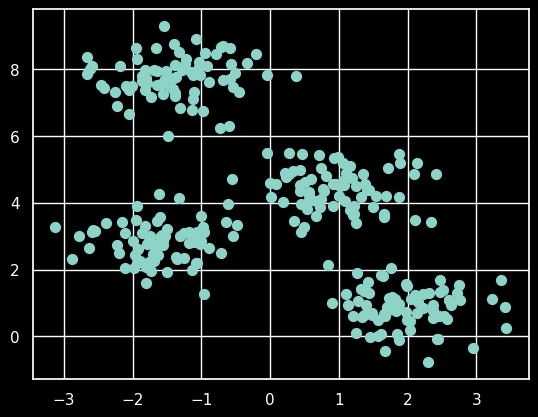

In [2]:
# Let's see a type of unsupervised learning models called clustering 
# algorithms. Clustering algorithms seek to learn from properties of the data
# an optimal division or discrete labeling of groups of points. Let's see 
# K-Means clustering

# The k-means algorithm searches for a predetermined number of clusters within 
# an unlabeled multidimensional dataset. It accomplishes this using a simple
# conception of what the optimal clustering looks like: -The "cluster center"
# is the arithmetic mean of all the points belonging to the cluster. 
# -Each point is closer to its own cluster center than to other cluster centers.
# Those two assumptions are the basis of the k-means model. First, let's
# generate a two-dimensional dataset containing four distinct blobs. 
# To emphasize that this is an unsupervised algorithm, we will leave the
# labels out of the visualization.
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples = 300, centers = 4,
                       cluster_std = 0.6, random_state = 0)
plt.scatter(X[:, 0], X[:, 1], s = 50);

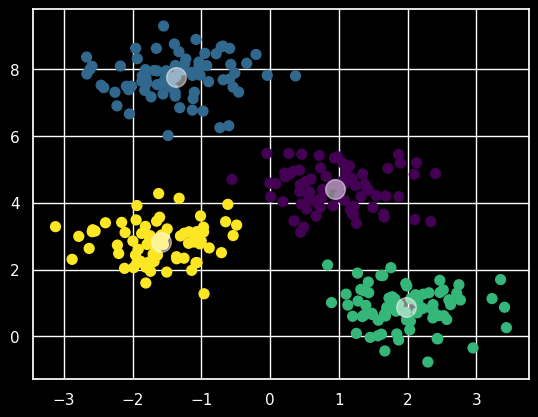

In [3]:
# By eye, it is relatively easy to pick out the four cluster. The k-means
# algorithm does this automatically
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
# Let's visualize the results by plotting the data colored by these laels. We
# will also plot the cluster centers as determined by the k-means estimator.
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 50, cmap = 'viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'white', s = 200, alpha = 0.5)

/tmp/ipykernel_2116/1101712544.py:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[:, 0], X[:, 1], c=c, cmap='viridis',


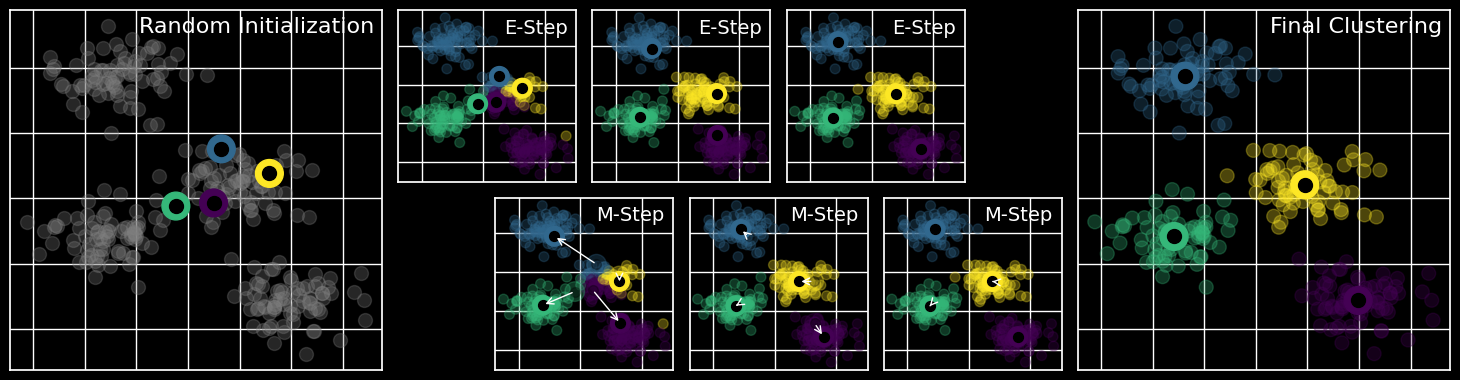

In [4]:
# The good news is that the k-means algorithm (at least in this simple case)
# assigns the points to clusters very similarly to how we might assign them by
# eye. But how does this algorithm assigns clusters so quickly? After all, the
# number of possible combinations of cluster assignments is exponential in 
# the number of data points. The typical approach to k-means involves an
# intuitive iterative approach known as "expectation-maximization".
# Expectation Maximization (E-M) is a powerful algorithm that comes up in a
# variety of contexts whitin data science. K-means is a particularly simple and 
# easy to understand application of this algorithm. In short, EM approach
# consists of the following procedure: 

# 1) Guess some cluster centers
# 2) Repeat until convergence 
#     2a) E-Step: assign points to the nearest cluster center 
#     2b) M-Step: set the cluster centers to the mean of the assigned
#                 points   
  
# Here the E-Step (or Expectation step) involves updating our expectation of 
# which cluster each point belongs to. The M-Step (or Maximization step)
# involves maximizing some fitness function that defines the location of the 
# cluster centers. In our case, the maximization is accomplished by taking a
# simple mean of the data in each cluster. Then, under typical circumstances,
# each repetition of the E-Step and M-Step will always result in a better
# estimate of the cluster characteristics. For our example, the clusters
# converge in just three iterations. 
show_kmeans_iterations()

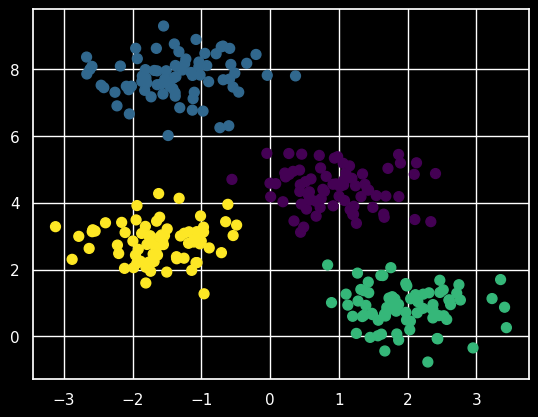

In [5]:
# The k-means algorithm is simple enough that we can write it in a few lines
# of code. The following is a very basic implementation.
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed = 2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    iteration = 0
    while True:
        #print(f"iteration number {iteration}")
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)

        # 2b: Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])

        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
        #iteration += 1
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c = labels,
            s = 50, cmap = 'viridis');

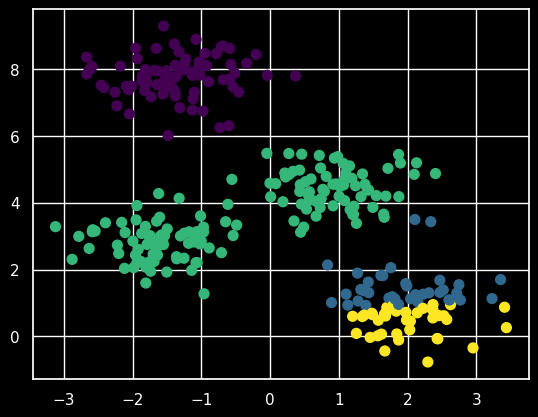

In [6]:
# There are a few issues to be aware of when using the expectation-maximization
# algorithm.
# "The globally optimal result may not be achieved" -> Although the E-M
# procedure is guaranteed to improve the result in each step, there is no
# assurance that it will lead to the global best solution. For example, if we 
# use a different random seed in our simple procedure, the particular starting 
# guesses lead to poor results.
centers, labels = find_clusters(X, 4, rseed = 0)
plt.scatter(X[:, 0], X[:, 1], c = labels,
            s = 50, cmap = 'viridis');
# Here, the E-M approach has converged, but has not converged to a globally
# optimal configuration. For this reason, it is common for the algorithm to
# be run for multiple starting guesses, as indeed Scikit-Learn dows by default
# (set by the n_init parameter, which defaults to 10).

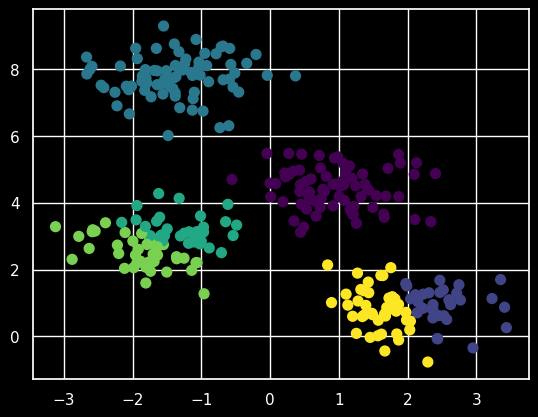

In [7]:
# "The number of clusters must be selected beforehand" -> Another common 
# challenge with k-means is that you must tell it how many clusteers you 
# expect: it cannot learn the number of clusters from the data. For example,
# if we ask the algorithm to identify six clusters, it will happily proceed 
# and find the best six clusters.
labels = KMeans(6, random_state = 0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c = labels,
            s = 50, cmap = 'viridis');
# Wether the result is meaningful is a question that is difficult to answer 
# definitively; one approach that is rather intuitive, but that we won't
# discuss further here, is called "silhouette analysis". Alternatively, you 
# might use a more complicated clustering algorithm which has a better 
# quantitative measure for the fitness per number of clusters 
# (e.g., Gaussian mixture models), or which CAN choose a suitable number of
# clusters (e.g., DBSCAN, mean-shift, or affinity propagation, all available
# in the sklearn.cluster submodule).

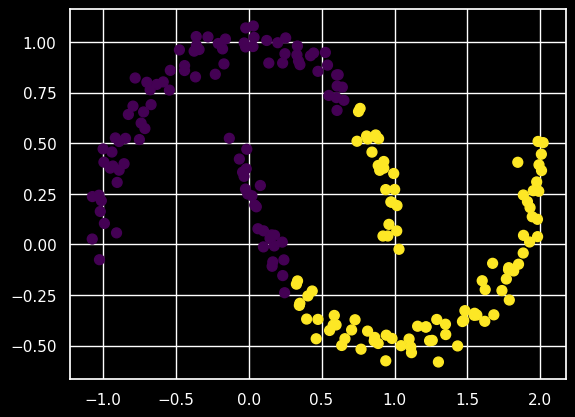

In [8]:
# "K-means is limited to linear cluster boundaries" -> The fundamental
# model assumptions of k-means (points will be closer to their own cluster
# center than to others) means that the algorithm will often be ineffective
# if the clusters have complicated geometris. In particular, the boundaries
# between k-means clusters will always be linear, which means that it will
# fail for more complicated boundaries. Consider the following data, along 
# with the cluster labels found by the typical k-means approach.
from sklearn.datasets import make_moons
X, y = make_moons(200, noise = .05, random_state = 0)
labels = KMeans(2, random_state = 0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c = labels, 
            s = 50, cmap = 'viridis');

/home/rick/Desktop/SecondYear/2ndSemester/Machine Learning/MLenv/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


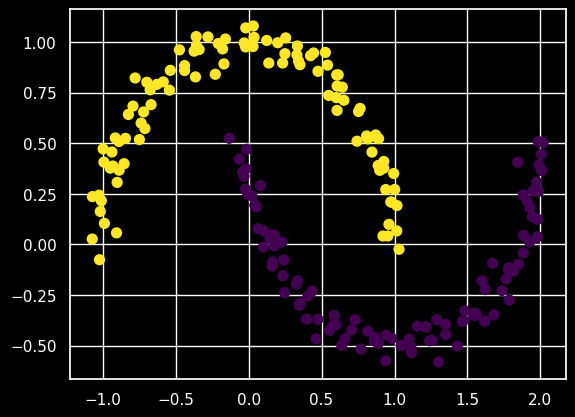

In [9]:
# What kind of tricks can we use to allow k-means to discover nonlinear
# boundaries? One way is to use k-means implemented in scikit-learn within
# the SpectralClustering estimator. It uses the graph of nearest neighbors
# to compute a higher-dimensional representation of the data, and then
# assigns labels using a k-means algorithm.
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters = 2,
                           affinity = 'nearest_neighbors', 
                           assign_labels = 'kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c = labels,
           s = 50, cmap = 'viridis')

# We see that with this kernel transform approach, the kernelized k-means
# is able to find the more complicated nonlinear boundaries between 
# clusters.

In [10]:
# "k-means can be slow for large number of samples" -> Because each
# iteration of k-means must access every point in the dataset, the 
# algorithm can be relatively slow as the number of samples grows. You
# might wonder if this requirement to use all data at each iteration can
# be relaxed; for example, you might just use a subset of the data to
# update the cluster centers at each step. This is the idea behind 
# batch-based k-means algorithms, one form of which is implemented in 
# sklearn.cluster.MiniBatchKMeans. The interface for this is the same as
# for standard KMeans; we will see an example of its use as we continue 
# our discussion.

# Example 1: k-means on digits -> Let's try to apply k-means on digits
# daset. Here, we will attempt to use k-means to try to identify similar
# digits without using the original label information; this might be 
# similar to a first step in extracting meaning from a new dataset about
# which you don't have any a priori label information. We will start by
# loading the digits and the finding the KMeans clusters. Recall that the 
# digits consists of 1797 samples with 64 features, where each of the 64
# features is the brightness of one pixel in an 8x8 image.
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [11]:
kmeans = KMeans(n_clusters = 10, random_state = 0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

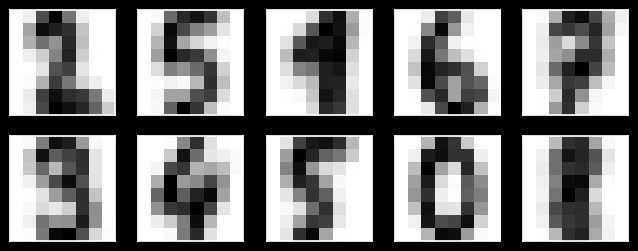

In [12]:
# The result is 10 clusters in 64 dimensions. Notica that the cluster
# centers themselves are 64-dimensional points, and can themselves be
# interpreted as the "typical" digit within the cluster. Let's see what
# these cluster centers look like.
fig, ax = plt.subplots(2, 5, figsize = (8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks = [], yticks = [])
    axi.imshow(center, interpolation = 'nearest', cmap = plt.cm.binary)

In [13]:
# We see that even without the labels, KMeans is able to find clusters 
# whose centers are recognizable digits, with perhaps the exception of 1
# and 8. Because k-means knows nothing about the identity of the cluster,
# the 0-9 lables may be permutated. We can fix this by matching each
# learned cluster label with the true lables found in them.
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]
# Now we can check how accurate our unsupervised clustering was in finding 
# similar digits within the data.
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7440178074568725

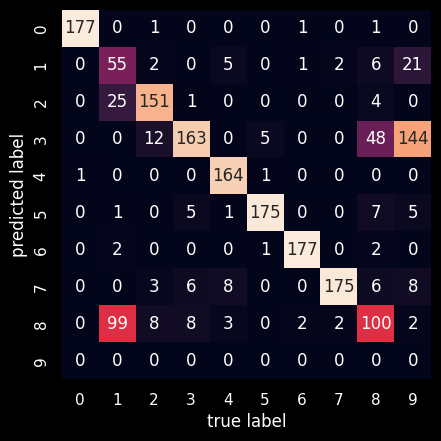

In [14]:
# With just a simple k-means algorithm, we discovered the correct grouping 
# for close to 75% of the input digits! Let's check the confusion matrix
# for this.
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False,
            xticklabels = digits.target_names, 
            yticklabels = digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');
# As we might expect from the cluster centers we visualized before, the 
# main point of confusion is between the eights and ones. But this still
# shows that using k-means, we can essentially build a digits classifier 
# without reference to any known labels!

In [17]:
# Just for fun, let's try to push this even further. We can use the
# t-distributed stochastic neighbor embedding (t-SNE) algorithm to
# preprocess the data before performing k-means. t-SNE is a non-linear
# embedding algoirthm that is particularly adept at preserving points 
# within clusters.
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components = 2, init = 'pca', random_state = 0)
digits_proj = tsne.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters = 10, random_state = 0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, labels)

# That's nearly 94% classification accuracy without using the labels! This 
# is the power of unsupervised learning when used carefully: it can
# extract information from the data-set that it might be difficult to do
# by hand or by eye.

0.9454646633277685

(427, 640, 3)

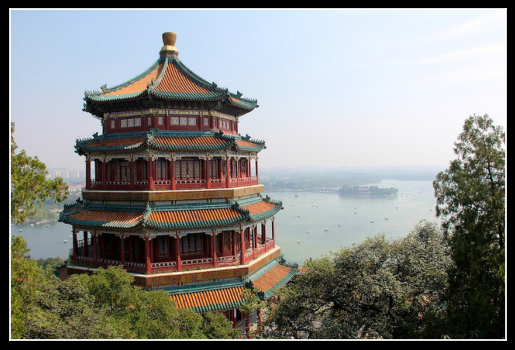

In [19]:
# Example 2: k-means for color compression.
# One interesting appplication of clustering is in color compression 
# within images. For example, imagine you have an image with millions of
# colors. In most images, a large number of the colors will be unused,
# and many of the pixels in the image will have similar or even identical
# colors. For example, consider the 'china.jpg' image, which is from
# scikit-learn's datasets module.
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks = [], yticks = [])
ax.imshow(china);
# The image itself is stored in a three-dimensional array of size 
# (height, width, RGB), containing red/blue/green contributions as
# integers from 0 to 255:
china.shape

In [20]:
# One way we can view this set of pixels is as a cloud of points in a
# three-dimensional color space. We will reshape the data to 
# [n_samples x n_features], and rescale the colors so that they lie 
# between 0 and 1.
data = china / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

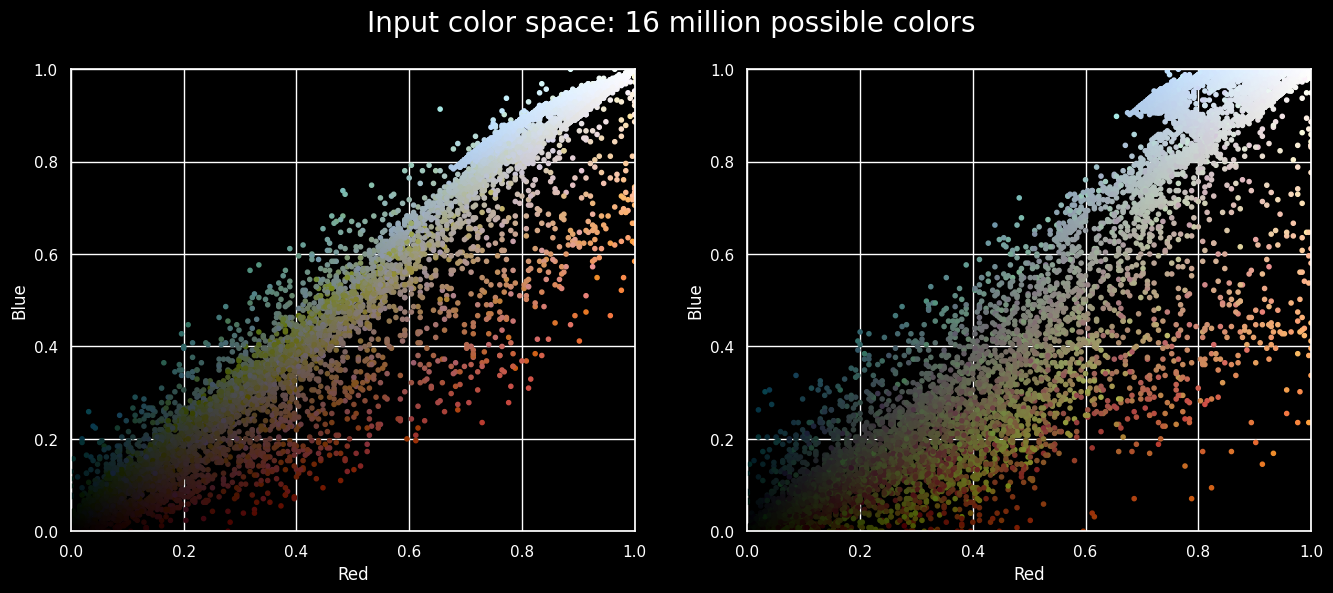

In [23]:
# We can visualize these pixels in this color space, using a subset of
# 10000 pixels for efficiency.
def plot_pixels(data, title, colors = None, N = 10000) -> None:
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize = (16, 6))
    ax[0].scatter(R, G, color = colors, marker = '.')
    ax[0].set(xlabel = 'Red', ylabel = 'Blue', xlim = (0, 1), ylim = (0, 1))

    ax[1].scatter(R, B, color = colors, marker = '.')
    ax[1].set(xlabel = 'Red', ylabel = 'Blue', xlim = (0, 1), ylim = (0, 1))
    
    fig.suptitle(title, size = 20)
    return

# The distribution of the pixels in RGB color space
plot_pixels(data, title = 'Input color space: 16 million possible colors')

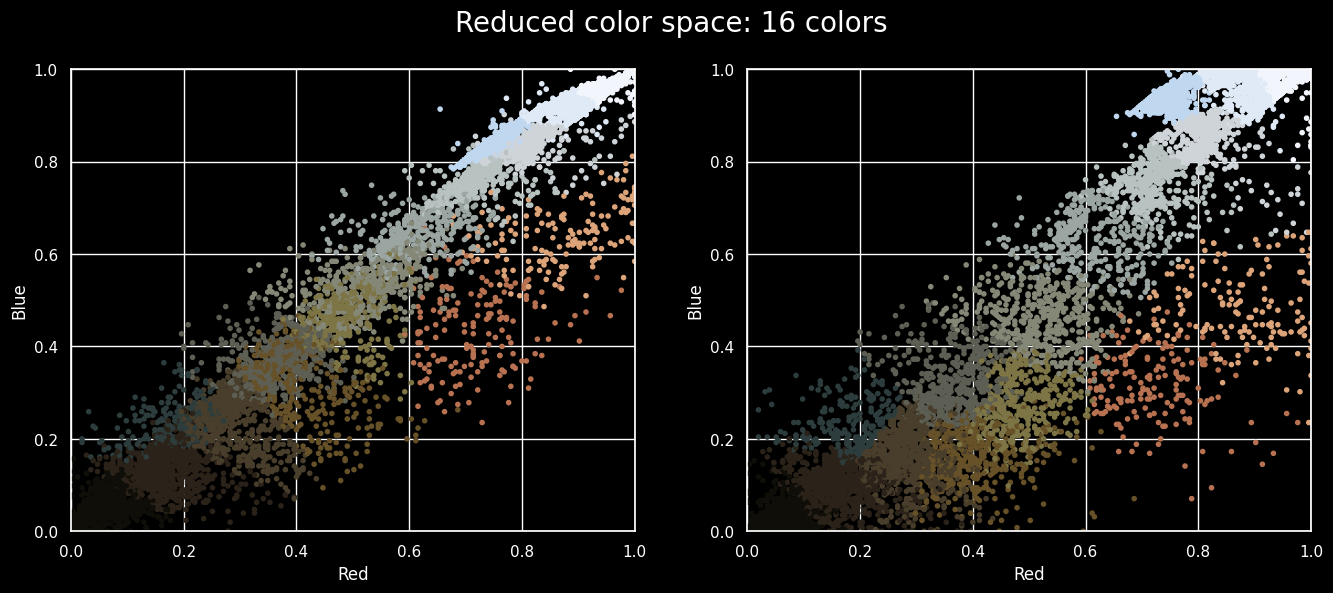

In [24]:
# Now let's reduce these 16 million colors to just 16 colors, using a
# k-means clustering across the pixel space. Because we are dealing with a 
# very large dataset, we will use the mini batch k-means, which operates
# on subsets of the data to compute the result much more quickly than the
# standard k-means algorithm.
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors = new_colors,
            title = "Reduced color space: 16 colors")

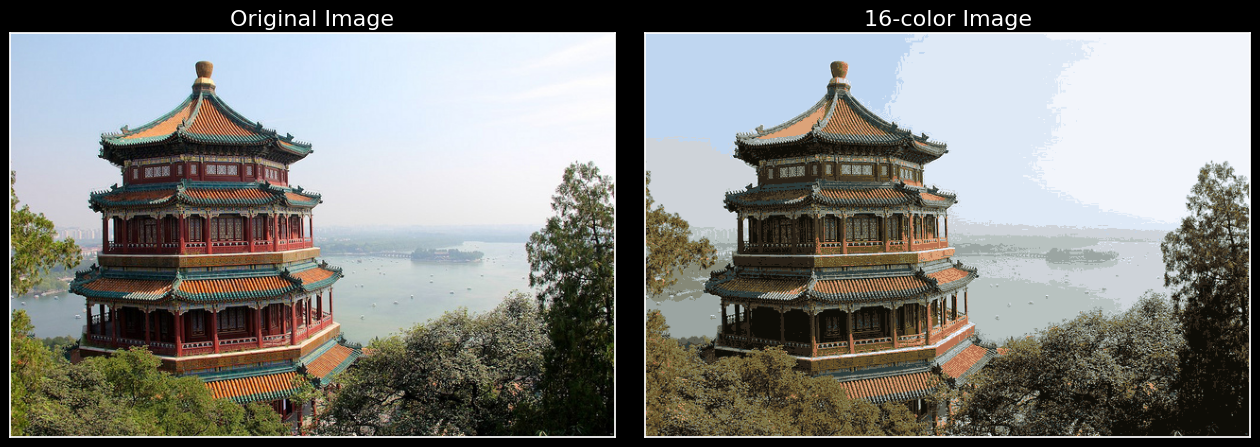

In [26]:
# The result is a recoloring of the original pixels, where each pixel is 
# assigned the color of its closest cluster center. Plotting these new 
# colors in the image space rather than the pixel space shows us the
# effect of this.
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize = (16, 6),
                       subplot_kw = dict(xticks = [], yticks = []))
fig.subplots_adjust(wspace = 0.05)
ax[0].imshow(china)
ax[0].set_title("Original Image", size = 16)
ax[1].imshow(china_recolored)
ax[1].set_title("16-color Image", size = 16);
# Some detail is certainly lost in the righmost panel, but the overall
# image is still easily recognizable. This image on the right achieves a
# compression factor of around 1 million! while this is an interesting 
# application of k-means, there are certainly better way to compress 
# information in images. But the example shows the power of thinking
# outside of the box with unsupervised methods like k-means.